# Data Bootcamp Final Project - Weather and Transportation in New York City

<img src="https://fthmb.tqn.com/IzDXCW-V8jc4yCiud8FPCVneuZY=/960x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/IMG_7344Best-1024x678-56a0be2c5f9b58eba4b3620e.jpg", style="width: 600px;"  />

**Author: Aristo P. Joesoef**

**e-mail: aristopj@gmail.com**

## Data Report

This project will explore the effects of weather (and other parameters) on MTA subway ridership. I posit that weather (whether it is sunny, raining, snowing etc.) will affect people's willingness to take the subway instead of walking or using other means of transportation (e.g. CitiBike, and other available non-underground transport data).

The first step is to construct a cross-sectional data to compare the number of subway users in different weather conditions, and compare these to the number of CitiBike users (and other available non-underground transport). The end goal is to find the correlation, if any, between weather statistics (temperature, rain/snow, etc.) and MTA subway transport use.

The following data are used:
* Citibike data, specifically the daily usage (usages of Citibike in 24-hour intervals)
* MTA subway turnstile data, which gives us the daily subway ridership in New York City
* Weather data from the National Centers for Environmental Information, which is open to public and provides daily weather data including, but not limited to, maximum and minimum temperature, snowfall, and rainfall.

## Packages

The most important packages are pandas and matplotlib, both of which are used to manipulate the data so that it is more easily understandable and to find connections or correlations between the available data sets. The numpy package assists the manipulation of the data by allowing for more complex numerical functions, while the datetime package allows us to manipulate date-time objects.

In [494]:
import pandas as pd #an important tool to create data frames and start the analysis

import matplotlib.pyplot as plt #a tool to visualize the available data

import numpy as np #this allows us to do more mathematical functions in our analysis

from datetime import date, datetime, timedelta
#this allows us to manipulate and create date-time objects

## Cleaning the Data

In [66]:
mta_url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_"
date = ["170107","170114","170121","170128",
       "170204","170211","170218","170225",
       "170304","170311","170318","170325",
       "170401","170408","170415","170422","170429",
       "170506","170513","170520","170527",
       "170603","170610","170617","170624",
       "170701","170708","170715","170722","170729",
       "170805","170812","170819","170826",
       "170902","170909","170916","170923","170930",
       "171007","171014","171021","171028",
       "171104","171111","171118","171125",
       "171202","171209","171216","171223","171230",
       "180106"]
#this is a list of the relevant dates from the MTA turnstile data

This list was generated manually. However, it is also possible to generate a set of dates through the datetime function with an interval of 7 days between each date, then format each date into a string with the correct format.

In [67]:
d = {} #d is an empty dictionary

for a in date:
    mta_data = mta_url + a +".txt"
    d[a] = pd.read_csv(mta_data)

#this for loop adds data frames from the MTA turnstile data into the empty dictionary, d

In [69]:
mta_data = pd.concat(d.values())
#this merges all the dataframes in the dictionary d into one larger dataframe

mta_data.tail()
#this code is used to check the number of rows from all the data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
200660,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,01/05/2018,04:00:00,REGULAR,2448082,27552
200661,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,01/05/2018,08:00:00,REGULAR,2448175,27559
200662,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,01/05/2018,12:00:00,REGULAR,2448484,27568
200663,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,01/05/2018,16:00:00,REGULAR,2448641,27578
200664,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,01/05/2018,20:00:00,REGULAR,2448770,27578


In [301]:
mta_data.LINENAME.value_counts()

1               1238143
6                625908
7                472804
F                391871
25               348480
A                315781
BQ               273054
MR               235502
L                230813
23               202073
BD               180283
123              179931
FG               168718
ACE              168598
NRW              166336
R                147834
G                145089
4567S            144400
2345ACJZ         141143
45               132397
C                129498
D                127743
BC               125206
Q                123444
BDFMNQRW         121932
4                120692
JZ               115619
ACENQRS1237W     113555
NQRW             112525
3                 93769
                 ...   
JZ456             29042
NQR456W           26969
456LNQRW          26871
FM                22455
7BDFM             22382
2345              22341
BDE               22231
1237ACENQRS       20332
ABCD              20255
6DF               20234
ACENGRS1237W    

The line of code above is used to see the values of the LINENAME column. LINENAME refers to the available subway lines in one station. For example, the 59th street station has 7 subway lines: N,Q,R,4,5,6, and W. Thus, the 59th street station has "NQR456W" in its LINENAME column.

In [287]:
mta = mta_data.loc[mta_data['LINENAME'] == 'NQR456W']

The 59th street station (LINENAME = "NQR456W"), the only station with the LINENAME "NQR456W", is arbitrarily chosen here as the main part of the MTA data. I am not using the whole of the MTA data due to a few key reasons:
* The MTA turnstile data is somewhat convoluted, with data being taken multiple times a day, at different devices within the same station.
* The ridership trend (increases and decreases) of the NYC subway is assumed to be similar from one station to another, thus the 59th street subway station can be used as a proxy to approximate the subway ridership trends of New York City's subway stations.
* 59th street is located in a fairly populated area, surrounded by large corporate offices. It should thus have large enough ridership numbers that will give a better picture of changes in ridership numbers.

In [288]:
mta_proper = mta.reset_index()
#we reset the index after choosing the data we want to use, so the index starts from 0 again.

In [289]:
mta_proper.head(20)
#double check whether the data is properly sliced from the larger data frame

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2016,03:00:00,REGULAR,5991546,2028378
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2016,07:00:00,REGULAR,5991565,2028389
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2016,11:00:00,REGULAR,5991644,2028441
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2016,15:00:00,REGULAR,5991971,2028502
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2016,19:00:00,REGULAR,5992418,2028543
5,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2016,23:00:00,REGULAR,5992638,2028572
6,6,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2017,03:00:00,REGULAR,5992718,2028585
7,7,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2017,07:00:00,REGULAR,5992730,2028594
8,8,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2017,11:00:00,REGULAR,5992776,2028636
9,9,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2017,15:00:00,REGULAR,5992980,2028680


In [290]:
mta_proper.loc[mta_proper['DATE'] == '01/07/2017']
#this step was done to illustrate the large number of data assigned to one date, even
#though the data had been narrowed down to one station.

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
499,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/07/2017,03:00:00,REGULAR,6001323,2031530
500,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/07/2017,07:00:00,REGULAR,6001335,2031553
501,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/07/2017,11:00:00,REGULAR,6001384,2031636
502,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/07/2017,15:00:00,REGULAR,6001587,2031696
503,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/07/2017,19:00:00,REGULAR,6001894,2031773
504,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/07/2017,23:00:00,REGULAR,6002096,2031813
541,42,A002,R051,02-00-01,59 ST,NQR456W,BMT,01/07/2017,03:00:00,REGULAR,5481030,1206389
542,43,A002,R051,02-00-01,59 ST,NQR456W,BMT,01/07/2017,07:00:00,REGULAR,5481043,1206400
543,44,A002,R051,02-00-01,59 ST,NQR456W,BMT,01/07/2017,11:00:00,REGULAR,5481113,1206456
544,45,A002,R051,02-00-01,59 ST,NQR456W,BMT,01/07/2017,15:00:00,REGULAR,5481289,1206506


In [291]:
mta_proper.SCP.value_counts()

02-03-00    2250
02-03-02    2250
02-00-00    2249
02-03-03    2249
02-03-05    2249
02-05-00    2249
02-05-01    2249
02-03-04    2249
02-03-06    2248
02-06-00    2247
02-00-01    2245
02-03-01    2235
Name: SCP, dtype: int64

Here, we check the value of the SCP column, which is a column for the Subunit Channel Position, which is information on the specific address of a "device" (as the language is somewhat ambiguous, I will assume that "device" refers to the individual turnstile).

In [292]:
scptest = mta_proper.loc[mta_proper['SCP'] == '02-03-00']
#Here, we take data that is associated with a specific turnstile/device

In [293]:
scptest.DATE.value_counts()

07/05/2017    9
07/26/2017    9
02/08/2017    8
02/10/2017    8
12/21/2017    7
10/16/2017    7
09/05/2017    7
11/17/2017    7
12/20/2017    7
04/24/2017    7
11/09/2017    7
07/07/2017    7
02/09/2017    7
03/18/2017    7
04/21/2017    7
12/13/2017    7
01/04/2018    7
11/05/2017    7
10/27/2017    7
02/15/2017    7
08/04/2017    6
08/23/2017    6
12/06/2017    6
04/10/2017    6
01/30/2017    6
11/13/2017    6
02/12/2017    6
02/19/2017    6
03/08/2017    6
08/17/2017    6
             ..
03/29/2017    6
07/30/2017    6
10/01/2017    6
09/08/2017    6
11/20/2017    6
11/19/2017    6
03/11/2017    6
05/28/2017    6
05/21/2017    6
03/14/2017    6
09/28/2017    6
08/21/2017    6
06/09/2017    6
01/22/2017    6
05/10/2017    6
11/07/2017    6
10/29/2017    6
07/22/2017    6
03/03/2017    6
10/23/2017    6
06/01/2017    6
10/04/2017    6
09/21/2017    6
12/31/2016    6
09/01/2017    6
09/17/2017    6
06/25/2017    6
11/18/2017    6
03/12/2017    5
03/09/2017    5
Name: DATE, Length: 371,

Here, I am checking the dates to see if there are any anomalies or strange outliers. The difference in the number of data points in each date is cause by the inconsistent data gathering by the MTA - from data gathering activities that are done outside of MTA's schedule, to missing data points where there should be one. For example, the MTA often gathers data everyday up to 11.00pm or 23.00. However, there are many data points for the 23.00 time slot that is missing.

In [482]:
scptest["date"] = pd.to_datetime(scptest["DATE"])
#Here, we change the format of values in the "DATE" column from strings to a date time format.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [483]:
scptest["date"]
#Again, this is another double check that the data has been manipulated properly.

83      2016-12-31
84      2016-12-31
85      2016-12-31
86      2016-12-31
87      2016-12-31
88      2016-12-31
89      2017-01-01
90      2017-01-01
91      2017-01-01
92      2017-01-01
93      2017-01-01
94      2017-01-01
95      2017-01-02
96      2017-01-02
97      2017-01-02
98      2017-01-02
99      2017-01-02
100     2017-01-02
101     2017-01-03
102     2017-01-03
103     2017-01-03
104     2017-01-03
105     2017-01-03
106     2017-01-03
107     2017-01-04
108     2017-01-04
109     2017-01-04
110     2017-01-04
111     2017-01-04
112     2017-01-04
           ...    
26552   2018-01-01
26553   2018-01-01
26554   2018-01-01
26555   2018-01-01
26556   2018-01-01
26557   2018-01-02
26558   2018-01-02
26559   2018-01-02
26560   2018-01-02
26561   2018-01-02
26562   2018-01-02
26563   2018-01-03
26564   2018-01-03
26565   2018-01-03
26566   2018-01-03
26567   2018-01-03
26568   2018-01-03
26569   2018-01-04
26570   2018-01-04
26571   2018-01-04
26572   2018-01-04
26573   2018

In [484]:
group = scptest.groupby("date")
#the groupby function allows for more straightforward operations on the data frame

In [485]:
daily_ave = group.mean()

The daily average of each day is taken instead of the difference between maximum and minimum values for the following reasons:

* The inconsistent data gathering activities of he MTA causes missing data points, which would mean that taking the difference between the largest and lowest value associated with a certain date will not always be comparable.
* A daily average is assumed to better represent the daily changes in ridership.

#### It is important to note that the numerical values under the "ENTRIES" and "EXITS" columns are accumulated values instead of daily values.

In [486]:
daily_ave

,index,ENTRIES,EXITS
date,,,
2016-12-31,85.5,8.420265e+05,3.132030e+06
2017-01-01,91.5,8.424167e+05,3.132957e+06
2017-01-02,97.5,8.427612e+05,3.133955e+06
2017-01-03,103.5,8.432092e+05,3.135692e+06
2017-01-04,109.5,8.437845e+05,3.137988e+06
2017-01-05,115.5,8.443613e+05,3.140394e+06
2017-01-06,121.5,8.449892e+05,3.142870e+06
2017-01-07,86.5,8.455353e+05,3.144729e+06
2017-01-08,92.5,8.458835e+05,3.145984e+06


In [488]:
daily_ave_diff = daily_ave.diff()
#Here, we take the difference between the accumulated value up until day t and day t-1
#this gives us the number of people who enter and/or exit in day t

daily_ave_diff.reset_index(inplace = True)
#As with the previous index reset, this is done for convenience so that the index
#starts at 0 again

daily_ave_diff["date"] = daily_ave_diff["date"].dt.strftime('%m/%d/%Y')
#Here, the format of the date is changed to match the format in the next data sets

daily_ave_diff.set_index("date", inplace = True)
#The date is now set as the new index

daily_ave_diff.drop(["12/31/2016", "01/01/2018","01/02/2018",
                    "01/03/2018","01/04/2018","01/05/2018"], inplace = True)
#As the dates are the index, it allows for easier removal of irrelevant dates

daily_ave_diff.reset_index(inplace = True)
#the index is reset after the irrelevant rows are removed

daily_ave_diff

,date,index,ENTRIES,EXITS
0,01/01/2017,6.0,390.166667,927.000000
1,01/02/2017,6.0,344.500000,998.333333
2,01/03/2017,6.0,448.000000,1736.666667
3,01/04/2017,6.0,575.333333,2296.333333
4,01/05/2017,6.0,576.833333,2406.333333
5,01/06/2017,6.0,627.833333,2475.500000
6,01/07/2017,-35.0,546.166667,1858.833333
7,01/08/2017,6.0,348.166667,1255.333333
8,01/09/2017,6.0,473.333333,1794.166667
9,01/10/2017,6.0,773.833333,2358.166667


In [489]:
github = "https://raw.githubusercontent.com/AristoJoesoef/my_first_repository/master/"
citi = "CitiBike_Ridership_2017.csv"
citibike_2017 = github+citi

The Citibike data consists of multiple csv files, which have been merged and uploaded onto my github site as a show of an alternative method of combining csv files (doing so manually before importing it into the iPython notebook), as compared to the method used to merge the csv files from the MTA turnstile data.

In [406]:
citibike = pd.read_csv(citibike_2017)

In [407]:
citibike.head(20)

,Date,Trips over the past 24-hours (midnight to 11:59pm),Miles traveled today (midnight to 11:59 pm),Total Annual Members (All Time),24-Hour Passes Purchased (midnight to 11:59 pm),3-Day Passes Purchased (midnight to 11:59 pm)
0,1/1/17,16009,50761,206624,1237,33
1,1/2/17,8921,21545,206675,142,15
2,1/3/17,14198,25879,206728,42,15
3,1/4/17,34039,69966,206778,475,29
4,1/5/17,28393,52446,206845,214,17
5,1/6/17,24177,48964,206879,157,17
6,1/7/17,4425,23556,206892,21,4
7,1/8/17,6417,22756,206907,27,2
8,1/9/17,15856,35209,206933,30,2
9,1/10/17,23232,46216,206955,67,12


In [334]:
nyc_weather_2017 = github + "NYC_Weather_2017.csv"

The weather data is taken from the National Center for Environmental Information, from who I had to request the weather data in a specific locatin (in this case, Central Park, NYC) and a specific date range (in this case, from the 1st of January of 2017 to the 31st of December of 2017). Thus, I have a csv file for my weather data, which I have uploaded to my github account.

In [338]:
nyc_weather = pd.read_csv(nyc_weather_2017, usecols = ['DATE','STATION','NAME','PRCP',
                                                       'SNOW','TMAX','TMIN'])

The relevant columns taken from the weatehr data are:
* Date of the data
* The weather station code where the data was recorded, in this case the code for Central Park in New York City
* The name of the weather station, in this case Central Park in New York City
* Precipitation, which is a measure of rainfall
* Snow, which is a measure of snowfall
* Maximum temperature at any given date
* Minimum temperature at any given date

In [339]:
nyc_weather.head(20)

,STATION,NAME,DATE,PRCP,SNOW,TMAX,TMIN
0,USW00094728,"NY CITY CENTRAL PARK, NY US",1/1/17,0.00,0.0,48,40
1,USW00094728,"NY CITY CENTRAL PARK, NY US",1/2/17,0.21,0.0,41,37
2,USW00094728,"NY CITY CENTRAL PARK, NY US",1/3/17,0.58,0.0,43,39
3,USW00094728,"NY CITY CENTRAL PARK, NY US",1/4/17,0.00,0.0,52,34
4,USW00094728,"NY CITY CENTRAL PARK, NY US",1/5/17,0.00,0.0,34,27
5,USW00094728,"NY CITY CENTRAL PARK, NY US",1/6/17,0.05,1.2,33,25
6,USW00094728,"NY CITY CENTRAL PARK, NY US",1/7/17,0.32,5.1,26,20
7,USW00094728,"NY CITY CENTRAL PARK, NY US",1/8/17,0.00,0.0,25,16
8,USW00094728,"NY CITY CENTRAL PARK, NY US",1/9/17,0.00,0.0,23,14
9,USW00094728,"NY CITY CENTRAL PARK, NY US",1/10/17,0.00,0.0,46,21


In [340]:
nyc_weather["TAVE"] = (nyc_weather["TMAX"]+nyc_weather["TMIN"])/2
#The average daily temperature is then calculated (and named "TAVE")

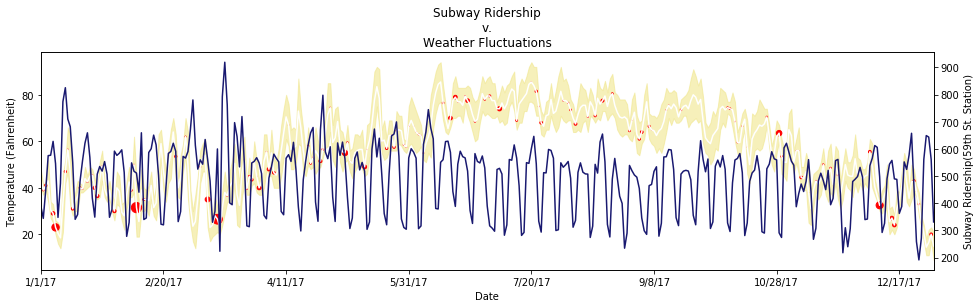

In [492]:
fig, ax1  = plt.subplots(figsize = (16,4))
#for this large dataset, a longer figure is preferable

nyc_weather["TAVE"].plot(ax = ax1, color = "white")
plt.fill_between(nyc_weather.index, nyc_weather["TMIN"],
                 nyc_weather["TMAX"], color = "#F0E68C", alpha = 0.6)
#Here, we create a shaded region between maximum and minimum daily temperature,
#and highlight the average daily temperature

ax1.scatter(nyc_weather.index, nyc_weather["TAVE"],
            s=10*(nyc_weather["PRCP"]+nyc_weather["SNOW"]),
            alpha= 1.0, color = "red")
#This creates a scatterplot of both rainfall and snowfall (represented by the size of the dot)

ax1.set_xlim(0,364)
#Set the plotted graph to only go as far as the available data (365th data point)

ax1.set_xlabel("Date")

ax1.set_title("Subway Ridership\n"+"v.\n"+"Weather Fluctuations")

ax1.set_ylabel("Temperature (Fahrenheit)")

#Set labels and titles

labels = [item.get_text() for item in ax1.get_xticklabels()]
#Make a list of the x tick labels

labels[0] = "1/1/17"
labels[1] = "2/20/17"
labels[2] = "4/11/17"
labels[3] = "5/31/17"
labels[4] = "7/20/17"
labels[5] = "9/8/17"
labels[6] = "10/28/17"
labels[7] = "12/17/17"
#Register the planned changes to the relevant x tick label

ax1.set_xticklabels(labels)
#Rename the x tick labels

ax2 = ax1.twinx()
#Set up a second y-axis on the other end of the graph

daily_ave_diff["ENTRIES"].plot(ax = ax2, color = "#191970")
#Plot the daily subway ridership

ax2.set_ylabel("Subway Ridership(59th St. Station)")
#Set y-label for the second y-axis

plt.show()

The data gives us some interesting observations. Most notably, the subway ridership numbers are cyclical, most likely caused by weekends or holidays. After all, the chosen location at 59th Street is located near many large corporate buildings. This means that the workforce in the area likely has a strong impact on the subway ridership. Moreover, the cyclical nature of the subway ridership seems to be largely unaffected by the changes in temperature. Again, this can be attributed to the nature of the people who often use this station (corporate office workers). These people need to go to work, at times regardless of weather conditions. Travel through this station is thus more of a necessity than a choice, which means that weather should not affect the subway ridership much or at all. There is also a lack of evidence that precipitation and/or snow has a strong impact on subway ridership. Rainfall and snowfall is represented by the red dots, where larger dots mean heavier rainfall and/or snowfall. Similarly to temperature changes, subway ridership is largely indifferent to changes in rainfall or snowfall. Thus, subway ridership in the 59th Street Station is largely cyclical in nature, unaffected by most weather fluctuations.

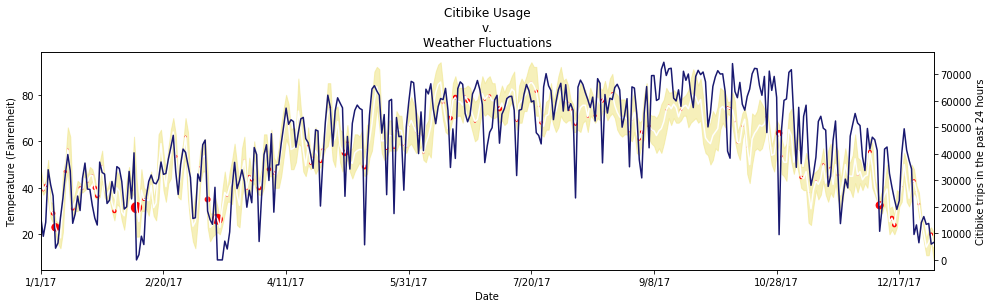

In [493]:
fig, ax1  = plt.subplots(figsize = (16,4))
#for this large dataset, a longer figure is preferable

nyc_weather["TAVE"].plot(ax = ax1, color = "white")
#Here, we create a shaded region between maximum and minimum daily temperature,
#and highlight the average daily temperature

plt.fill_between(nyc_weather.index, nyc_weather["TMIN"],
                 nyc_weather["TMAX"], color = "#F0E68C", alpha = 0.6)
#This creates a scatterplot of both rainfall and snowfall (represented by the size of the dot)

ax1.scatter(nyc_weather.index, nyc_weather["TAVE"],
            s=10*(nyc_weather["PRCP"]+nyc_weather["SNOW"]),
            alpha= 1.0, color = "red")

ax1.set_xlim(0,364)
#Set the plotted graph to only go as far as the available data (365th data point)

ax1.set_xlabel("Date")

ax1.set_title("Citibike Usage\n"+"v.\n"+"Weather Fluctuations")

ax1.set_ylabel("Temperature (Fahrenheit)")

#Set labels and titles

labels = [item.get_text() for item in ax1.get_xticklabels()]
#Make a list of the x tick labels

labels[0] = "1/1/17"
labels[1] = "2/20/17"
labels[2] = "4/11/17"
labels[3] = "5/31/17"
labels[4] = "7/20/17"
labels[5] = "9/8/17"
labels[6] = "10/28/17"
labels[7] = "12/17/17"
#Register the planned changes to the relevant x tick label

ax1.set_xticklabels(labels)
#Rename the x tick labels

ax2 = ax1.twinx()
#Set up a second y-axis on the other end of the graph

citibike["Trips over the past 24-hours (midnight to 11:59pm)"].plot(ax = ax2,
                                                                   color = "#191970")
#Plot the 24-hour usage data of Citibike

ax2.set_ylabel("Citibike trips in the past 24 hours")
#Set y-label for the second y-axis

plt.show()

Unlike the case with subway ridership, Citibike usage can loosely be said to be affected by weather fluctuations. As the average temperature of the day increases, there is a higher likelihood for people to use Citibike. The red dots that signify rainfall and/or snowfall can be seen to be closer, in the most part, to the throughs/valleys of the Citibike usage graph instead of the crests/peaks. However, without further rigorous statistical analysis, it is not possible to make a conclusion on the effects of rainfall and/or snowfall on Citibike usage. An interesting thing to note is the large fluctuations in the daily Citibike usage, which can be caused by various reasons such as lack of promotion or renewals of Citibike membership, shifting preferences for other forms of transportation etc.

## Conclusion

Interestingly, increases in Citibike usage does not have a strong impact on subway ridership. This implies that the consumers that Citibike and the MTA are offering their services to are from a different market segment, eitehr due to price constraints or due to differences in preferences. For example, the corporate workers theorized to use the 59th Street Station can be less inclined to use Citibike for transportation because they want to avoid sweating, because they prefer being in the subway where they can relax while waiting for the train to arrive or to reach their stop, etc.


Though the subway ridership is largely unaffected, Citibike usage does seem to fluctuate with increases and decreases in temperature. From the fluctuations of Citibike usage, there is some positive correlation between Citibike usage and warmth (higher temperatures). Holding the assumption that users of Citibike are at least partially motivated to use Citibike so that they can enjoy the weather, we can concluded that higher temperatures are often viewed to be "good" weather, while colder temperatures disincentivize people from spending too much time outside. Of course, there are various factors taht are unaccounted for in this analysis, stemming from a priori knowledge of what is generally said to be "good" weather. For example, the absence of strong winds, tbe presence of warm sunlight, the lack of piled up snow etc. are often considered to be conditions that contribute to "good" weather.


Unfortunately, the data set, specifically the data set on the weather in New York City, lacks many important parameters. It does not tell us, for example, of the strength of sunlight in each day.